In [121]:
!pip install torch torchvision
!pip install numpy

In [149]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
def sigmoid_scaler(x):
  return 1/(1+np.exp(-x))
sigmoid  = np.vectorize(sigmoid_scaler)    # np.vectorize() --->  to convert matrix into array

def softmax(x):
  return np.exp(x)/np.exp(x).sum()

def log_loss(y,y_hat):
  return -np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))

def l2_norm(y,y_hat):
  return np.sum((y-y_hat)**2)

In [124]:
x = [.1, .3, .4, .7, .2, .8, .4, .35]
y = [.5, .45, .56, .75, .35, .3, .67, .8]

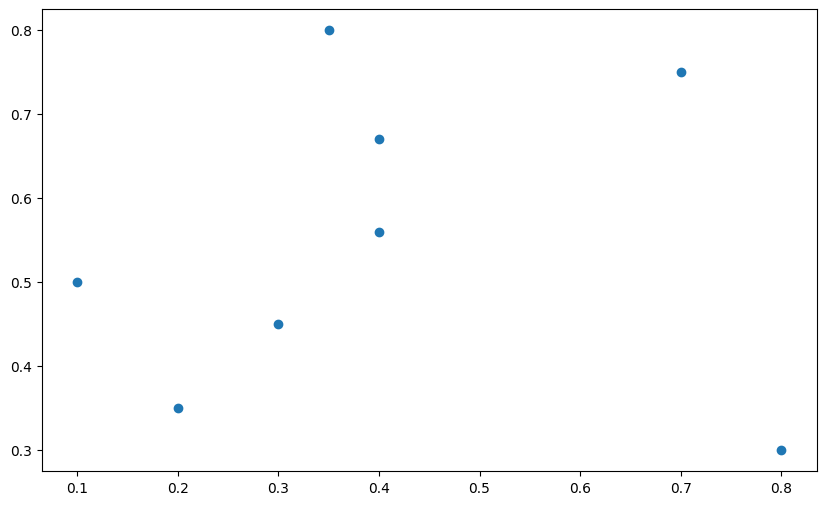

In [125]:
plt.figure(figsize = (10,6))
plt.scatter(x,y)
plt.show()

In [126]:
w_init = torch.rand(1)
b = torch.rand(1)

In [127]:
# calculating the linear pass
for i in range(len(x)):
  a_11 = w_init * x[i] + b
  y_hat = sigmoid_scaler(a_11)
  print(y_hat)

tensor([0.5762])
tensor([0.6164])
tensor([0.6360])
tensor([0.6919])
tensor([0.5965])
tensor([0.7094])
tensor([0.6360])
tensor([0.6263])


In [128]:
loss = l2_norm(y,a_11.detach().numpy())
loss

0.2397829804477181

### For Stochastic Gradient Descent

In [129]:

error = 0
for x , y in zip(x,y):
  a_11 = w_init * x + b
  y_hat = sigmoid_scaler(a_11)
  error += l2_norm(y,a_11.detach().numpy())

error

0.48690469167831907

In [130]:
def grad_w(x,y,w,b):
  a_11 = w * x + b
  y_hat = sigmoid_scaler(a_11)
  grad = -2*(y-y_hat)*y_hat*(1-y_hat)*x
  return grad

def grad_b(x,y,w,b):
  a_11 = w * x + b
  y_hat = sigmoid_scaler(a_11)
  grad = -2*(y-y_hat)*y_hat*(1-y_hat)
  return grad

w_grad = grad_w(x=.1,y=.5,w =.3,b= 0)
b_grad = grad_b(x=.1,y=.5,w =.3,b= 0)

In [131]:
# Updating weight with new data
eta = 0.9
w_new = 0.3 - eta*w_grad
b_new = 0 - eta*b_grad
print(w_new, b_new)

0.299662601230639 -0.003373987693610334


In [132]:
w_new = w_new - eta*grad_w(x=.3,y=.45,w =w_new,b= b_new)
b_new = b_new - eta*grad_b(x=.3,y=.45,w =w_new,b= b_new)
print(w_new, b_new)

0.29001228311546956 -0.035221132421431746


In [141]:
w = 0.3; b = 0; eta = 0.9
x = [.1, .3, .4, .7, .2, .8, .4, .35]
y = [.5, .45, .56, .75, .35, .3, .67, .8]
j = []
for i in range(10):
  error= 0
  for x_val,y_val in zip(x,y):
    dw = grad_w(x_val,y_val,w,b)
    db = grad_b(x_val,y_val,w,b)
    w = w - eta*dw
    b = b - eta*db
    error += (y_val - sigmoid_scaler(w*x_val + b))**2
  print(f"After {i} epoch Weight is {w}, and Bias is {b} and error {error/8}")
  j.append([w,b,error/8])

After 0 epoch Weight is 0.32685209451992864, and Bias is 0.08082036247262894 and error 0.024419018236531677
After 1 epoch Weight is 0.3331534131312405, and Bias is 0.10889312775126395 and error 0.024434784222969217
After 2 epoch Weight is 0.33273970166544414, and Bias is 0.11945476736170701 and error 0.024520678892687327
After 3 epoch Weight is 0.3301577205566702, and Bias is 0.12409150127007032 and error 0.02455737771555506
After 4 epoch Weight is 0.3269286921183709, and Bias is 0.12668698843921594 and error 0.02456938362961479
After 5 epoch Weight is 0.3235637470059331, and Bias is 0.12855462128096828 and error 0.024572177045491393
After 6 epoch Weight is 0.3202331990655267, and Bias is 0.13014065556357507 and error 0.024571824789997025
After 7 epoch Weight is 0.3169919936997593, and Bias is 0.13159762910214506 and error 0.02457047592749504
After 8 epoch Weight is 0.3138560404548545, and Bias is 0.13297844250790142 and error 0.024568865902869882
After 9 epoch Weight is 0.310828098454

In [144]:
import pandas as pd
df = pd.DataFrame(j, columns = ["Weight", "Bias", "Error(MSE)"])
df.index.name = "Epoch"
df.head(4)

,Weight,Bias,Error(MSE)
Epoch,,,
0,0.326852,0.080820,0.024419
1,0.333153,0.108893,0.024435
2,0.332740,0.119455,0.024521
3,0.330158,0.124092,0.024557


<Axes: xlabel='Epoch'>

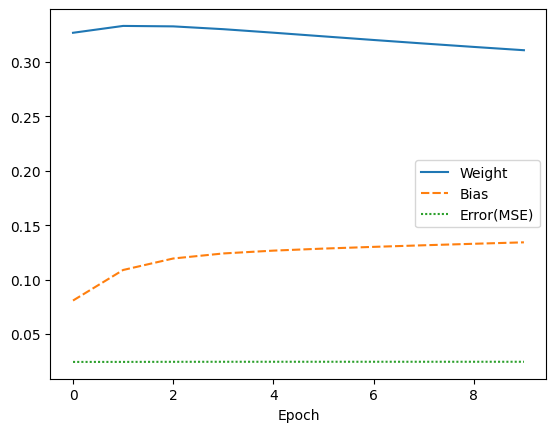

In [151]:
fig, ax = plt.subplots()
sns.lineplot(df, ax = ax)